## Import packages and modules

In [1]:
from models.tda_models import TDA_PI34_Model, TDA_PI42_Model, VECTOR_STITCHING_PI_Model_34, VECTOR_STITCHING_PI_Model_42
from models.raw_models import Raw_Model, Dummy_Model
from tda_pipelines import *


## Fetch dataset, prepare training and testing sets, generate distorted sets

In [4]:
# fetch data, prepare for pipeline and test models

from sklearn.datasets import fetch_openml 
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf

#X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

(X, y), _ = tf.keras.datasets.mnist.load_data()
print(f"X shape: {X.shape}, y shape: {y.shape}")
train_size, test_size = 100, 100 # Reshape to (n_samples, n_pixels_x, n_pixels_y) 
X = X.reshape((-1, 28, 28)) 
X_train, X_test, y_train, y_test = train_test_split( X, y, train_size=train_size, test_size=test_size, stratify=y, random_state=666 ) 
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}") 
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


# mnist comes with string labels, we need to convert them to int
y_train = y_train.astype(int)
y_test = y_test.astype(int)


X shape: (60000, 28, 28), y shape: (60000,)
X_train shape: (100, 28, 28), y_train shape: (100,)
X_test shape: (100, 28, 28), y_test shape: (100,)


C:\Users\jawor\AppData\Local\Temp\ipykernel_30508\2546615655.py:5: FutureWarning: `seed` is a deprecated argument name for `random_noise`. It will be removed in version 0.23. Please use `rng` instead.
  X_train_noisy = random_noise(X_train, mode="s&p",amount=0.05, seed=666)
C:\Users\jawor\AppData\Local\Temp\ipykernel_30508\2546615655.py:6: FutureWarning: `seed` is a deprecated argument name for `random_noise`. It will be removed in version 0.23. Please use `rng` instead.
  X_test_noisy = random_noise(X_test, mode="s&p",amount=0.05, seed=666)


Text(0.5, 1.0, 'Noisy Image with Random Noise')

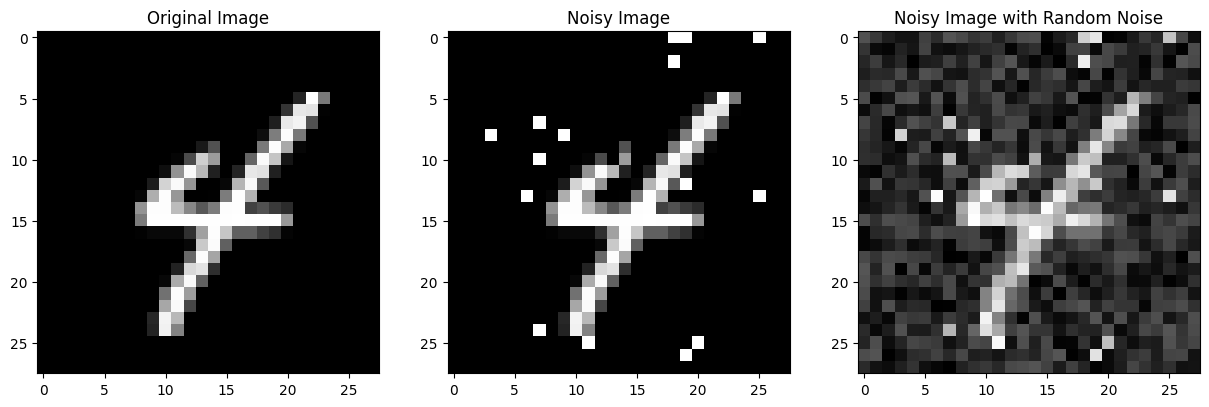

In [37]:
# distort X_train and X_test a little bit not using giotto
import matplotlib.pyplot as plt
import tensorflow as tf
from skimage.util import random_noise
X_train_noisy = random_noise(X_train, mode="s&p",amount=0.05, seed=666)
X_test_noisy = random_noise(X_test, mode="s&p",amount=0.05, seed=666)

# generate random noise matrix of size X_train_noisy.shape and X_test_noisy.shape but without original image

X_train_gaussian_noise = np.random.rand(*X_train_noisy.shape)
X_test_gaussian_noise = np.random.rand(*X_test_noisy.shape)

# for each image in X_train_noisy and X_test_noisy, we will add the random noise matrix to the image

X_train_noisy_random = X_train_noisy + X_train_gaussian_noise
X_test_noisy_random = X_test_noisy + 0.5*X_test_gaussian_noise

# plot the original image, the noisy image and the noisy image with random noise

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(X_test[5], cmap="gray")
ax[0].set_title("Original Image")
ax[1].imshow(X_test_noisy[5], cmap="gray")
ax[1].set_title("Noisy Image")
ax[2].imshow(X_test_noisy_random[5], cmap="gray")
ax[2].set_title("Noisy Image with Random Noise")


## Load TDA and Vector-stitching pipelines 

In [6]:
# load pipelines 

tda_pipeline_34 = TDA_PI34_Pipeline()
tda_pipeline_42 = TDA_PI42_Pipeline()
vector_stitching_pipeline_34, tda_union_34 = VECTOR_STITCHING_PI_Pipeline_34()
vector_stitching_pipeline_42, tda_union_42 = VECTOR_STITCHING_PI_Pipeline_42()


## Transform raw data to persistance images and stitched RAW-PI images

In [7]:
# clean data

X_train_clean_tda_34 = tda_pipeline_34.fit_transform(X_train)
print("done")
X_test_clean_tda_34 = tda_pipeline_34.transform(X_test)
print("done")

# distorted data
X_train_noisy_tda_34 = tda_pipeline_34.fit_transform(X_train_noisy_random)
print("done")
X_test_noisy_tda_34 = tda_pipeline_34.transform(X_test_noisy_random)
print("done")


done
done
done
done
done
done
done
done


In [8]:

#important for initializing Binarizer
#X_training = tda_union.fit(X_train)

#clean data
X_train_clean_vector_stitching_34 = vector_stitching_pipeline_34.fit_transform(X_train)
print("done")
X_test_clean_vector_stitching_34 = vector_stitching_pipeline_34.transform(X_test)
print("done")

# distorted data
X_train_noisy_vector_stitching_34 = vector_stitching_pipeline_34.fit_transform(X_train_noisy_random)
print("done")
X_test_noisy_vector_stitching_34 = vector_stitching_pipeline_34.transform(X_test_noisy_random)
print("done")

done
done
done
done
done
done
done
done


In [9]:
# this needs to be integrated into pipeline, transposing the data to fit the input shape of the model

# normal tda
X_train_clean_tda_good_34 = np.transpose(X_train_clean_tda_34, (0, 3, 2, 1))
X_test_clean_tda_good_34 = np.transpose(X_test_clean_tda_34, (0, 3, 2, 1))

X_train_noisy_tda_good_34 = np.transpose(X_train_noisy_tda_34, (0, 3, 2, 1))
X_test_noisy_tda_good_34 = np.transpose(X_test_noisy_tda_34, (0, 3, 2, 1))

#stitched

X_train_clean_vector_stitching_good_34 = np.transpose(X_train_clean_vector_stitching_34, (0, 3, 2, 1))
X_test_clean_vector_stitching_good_34 = np.transpose(X_test_clean_vector_stitching_34, (0, 3, 2, 1))

X_train_noisy_vector_stitching_good_34 = np.transpose(X_train_noisy_vector_stitching_34, (0, 3, 2, 1))
X_test_noisy_vector_stitching_good_34 = np.transpose(X_test_noisy_vector_stitching_34, (0, 3, 2, 1))

# shapes
print(f"X_train_clean_tda_good shape: {X_train_clean_tda_good_34.shape}, X_test_clean_tda_good shape: {X_test_clean_tda_good_34.shape}")
print(f"X_train_noisy_tda_good shape: {X_train_noisy_tda_good_34.shape}, X_test_noisy_tda_good shape: {X_test_noisy_tda_good_34.shape}")
print(f"X_train_clean_vector_stitching_good shape: {X_train_clean_vector_stitching_good_34.shape}, X_test_clean_vector_stitching_good shape: {X_test_clean_vector_stitching_good_34.shape}")
print(f"X_train_noisy_vector_stitching_good shape: {X_train_noisy_vector_stitching_good_34.shape}, X_test_noisy_vector_stitching_good shape: {X_test_noisy_vector_stitching_good_34.shape}")




X_train_clean_tda_good shape: (100, 28, 28, 34), X_test_clean_tda_good shape: (100, 28, 28, 34)
X_train_noisy_tda_good shape: (100, 28, 28, 34), X_test_noisy_tda_good shape: (100, 28, 28, 34)
X_train_clean_vector_stitching_good shape: (100, 56, 28, 34), X_test_clean_vector_stitching_good shape: (100, 56, 28, 34)
X_train_noisy_vector_stitching_good shape: (100, 56, 28, 34), X_test_noisy_vector_stitching_good shape: (100, 56, 28, 34)


In [10]:
X_train_expanded, X_test_noisy_random_expanded, X_test_expanded = transform_data(X_train, X_test_noisy_random, X_test)
_, X_train_noisy_random_expanded, _ = transform_data(X_train, X_train_noisy_random, X_test)

## Prepare 90% clean and 10% distorted training and testing sets

In [25]:
from sklearn.utils import shuffle

# prepare 90% clean and 10% noisy data for training and testing
# X_tr_ should be clean raw data of 90% clean and 10% noisy

percent = 10
# calculate how many distorted data should be added to the clean data
n = int((percent/100)*X_train_expanded.shape[0])


X_tr = np.concatenate((X_train_expanded[:-n], X_train_noisy_random_expanded[:n]), axis=0)
y_tr = np.concatenate((y_train[:-n], y_train[:n]), axis=0)
X_tr, y_tr = shuffle(X_tr, y_tr, random_state=666)

# the same for other data
X_tr_tda_34 = np.concatenate((X_train_clean_tda_good_34[:-n], X_train_noisy_tda_good_34[:n]), axis=0)
y_tr_tda_34 = np.concatenate((y_train[:-n], y_train[:n]), axis=0)
X_tr_tda_34, y_tr_tda_34 = shuffle(X_tr_tda_34, y_tr_tda_34, random_state=666)


X_tr_vector_stitching_34 = np.concatenate((X_train_clean_vector_stitching_good_34[:-n], X_train_noisy_vector_stitching_good_34[:n]), axis=0)
y_tr_vector_stitching_34 = np.concatenate((y_train[:-n], y_train[:n]), axis=0)
X_tr_vector_stitching_34, y_tr_vector_stitching_34 = shuffle(X_tr_vector_stitching_34, y_tr_vector_stitching_34, random_state=666)


print(f"X_tr shape: {X_tr.shape}, y_tr shape: {y_tr.shape}")
print(f"X_tr_tda_34 shape: {X_tr_tda_34.shape}, y_tr_tda_34 shape: {y_tr_tda_34.shape}")
print(f"X_tr_vector_stitching_34 shape: {X_tr_vector_stitching_34.shape}, y_tr_vector_stitching_34 shape: {y_tr_vector_stitching_34.shape}")



X_tr shape: (100, 28, 28, 1), y_tr shape: (100,)
X_tr_tda_34 shape: (100, 28, 28, 34), y_tr_tda_34 shape: (100,)
X_tr_vector_stitching_34 shape: (100, 56, 28, 34), y_tr_vector_stitching_34 shape: (100,)


# Use new module to generate full experiment input data

In [41]:
from data_preprocessing import process
(X, y), _ = tf.keras.datasets.mnist.load_data()

data = process(data=(X, y), training_size=10, testing_size=10, dist_ratio=10)

c:\Users\jawor\Desktop\Projekt_licencjacki\data_preprocessing.py:42: FutureWarning: `seed` is a deprecated argument name for `random_noise`. It will be removed in version 0.23. Please use `rng` instead.
  X_train_noisy = random_noise(X_train, mode="s&p",amount=0.05, seed=666)
c:\Users\jawor\Desktop\Projekt_licencjacki\data_preprocessing.py:43: FutureWarning: `seed` is a deprecated argument name for `random_noise`. It will be removed in version 0.23. Please use `rng` instead.
  X_test_noisy = random_noise(X_test, mode="s&p",amount=0.05, seed=666)


done1
done2
done3
done4
done5
done6
done7
done8


# Initialize models

In [42]:
# models

raw_model = Raw_Model() # cnn models working on raw images
dummy_model = Dummy_Model() # fully dense model working on raw images
tda_model_34 = TDA_PI34_Model() # cnn model working on persistance images
tda_model_42 = TDA_PI42_Model() # cnn model working on persistance images
vector_stitching_model_34 = VECTOR_STITCHING_PI_Model_34() # cnn model working on stitched raw and PI images
vector_stitching_model_42 = VECTOR_STITCHING_PI_Model_42() # cnn model working on stitched raw and PI images


## Fitting and validating models

All models are trained on clean data, and then validated on only distorted data (look up 2nd paragraph to see plotted example images)

In [43]:
tf.keras.backend.clear_session()

In [44]:
#TDA model

tda_model_34.model.fit(data["X_tr_tda_34"], data["y_tr_tda_34"], epochs=20, batch_size=1, validation_data=(data["X_test_noisy_tda_good_34"], data["y_test"]))

Epoch 1/20
10/10 [==============================] - 3s 76ms/step - loss: 3.6559 - accuracy: 0.1000 - val_loss: 7.2002 - val_accuracy: 0.2000
Epoch 2/20
10/10 [==============================] - 0s 26ms/step - loss: 3.1774 - accuracy: 0.2000 - val_loss: 7.0160 - val_accuracy: 0.1000
Epoch 3/20
10/10 [==============================] - 0s 32ms/step - loss: 1.8087 - accuracy: 0.3000 - val_loss: 8.0114 - val_accuracy: 0.1000
Epoch 4/20
10/10 [==============================] - 0s 50ms/step - loss: 1.6880 - accuracy: 0.4000 - val_loss: 6.3501 - val_accuracy: 0.1000
Epoch 5/20
10/10 [==============================] - 0s 53ms/step - loss: 1.0204 - accuracy: 0.8000 - val_loss: 7.1780 - val_accuracy: 0.1000
Epoch 6/20
10/10 [==============================] - 0s 49ms/step - loss: 0.7656 - accuracy: 0.8000 - val_loss: 8.4078 - val_accuracy: 0.1000
Epoch 7/20
10/10 [==============================] - 0s 44ms/step - loss: 0.5464 - accuracy: 0.9000 - val_loss: 12.4109 - val_accuracy: 0.1000
Epoch 8/20
1

In [45]:
predictions_tda = tda_model_34.model.predict(X_test_noisy_tda_good_34)

score =0
for i,row in enumerate(predictions_tda):
    print(np.argmax(row), y_test[i])
    if np.argmax(row) == y_test[i]:
        score += 1

print(f"Accuracy: {score/len(predictions_tda)}")

4/4 [==============================] - 0s 12ms/step
0 4
0 5
0 6
0 1
0 2
0 4
0 8
0 0
0 8
0 7
0 7
0 4
0 4
0 2
0 3
0 6
0 6
0 7
0 2
0 0
0 0
0 7
0 1
0 6
0 0
0 5
0 0
0 4
0 4
0 3
0 1
0 3
0 2
0 6
0 3
0 0
0 2
0 3
0 5
0 8
0 4
0 1
0 3
0 9
0 2
0 3
0 2
0 6
0 0
0 4
0 5
0 6
0 6
0 5
0 7
0 5
0 9
0 7
0 7
0 2
0 0
0 9
0 7
0 2
0 2
0 9
0 8
0 7
0 9
0 4
0 1
0 0
0 9
0 8
0 1
0 9
0 8
0 1
0 6
0 5
0 1
0 9
0 3
0 3
0 8
0 3
0 0
0 1
0 9
0 8
0 1
0 5
0 8
0 6
0 1
0 7
0 5
0 9
0 4
0 8
Accuracy: 0.1


In [46]:
tf.keras.backend.clear_session()

In [31]:
# RAW model
raw_model.model.fit(X_tr, y_tr, epochs=20, batch_size=5, validation_data=(X_test_noisy_random_expanded, y_test))

Epoch 1/20
20/20 [==============================] - 3s 37ms/step - loss: 9.2035 - accuracy: 0.1800 - val_loss: 2.2980 - val_accuracy: 0.1800
Epoch 2/20
20/20 [==============================] - 0s 23ms/step - loss: 1.9751 - accuracy: 0.4200 - val_loss: 2.2996 - val_accuracy: 0.1900
Epoch 3/20
20/20 [==============================] - 1s 27ms/step - loss: 1.1975 - accuracy: 0.5800 - val_loss: 2.2990 - val_accuracy: 0.1200
Epoch 4/20
20/20 [==============================] - 1s 42ms/step - loss: 0.8358 - accuracy: 0.7800 - val_loss: 2.2971 - val_accuracy: 0.2000
Epoch 5/20
20/20 [==============================] - 1s 32ms/step - loss: 0.7305 - accuracy: 0.7900 - val_loss: 2.2956 - val_accuracy: 0.2100
Epoch 6/20
20/20 [==============================] - 1s 42ms/step - loss: 0.4406 - accuracy: 0.8600 - val_loss: 2.2954 - val_accuracy: 0.1900
Epoch 7/20
20/20 [==============================] - 1s 37ms/step - loss: 0.3232 - accuracy: 0.9100 - val_loss: 2.2938 - val_accuracy: 0.2100
Epoch 8/20
20

In [32]:
predictions_raw = raw_model.model.predict(X_test_noisy_random_expanded)

scoreraw=0

for i,row in enumerate(predictions_raw):
    print(np.argmax(row), y_test[i])
    if np.argmax(row) == y_test[i]:
        scoreraw += 1

print(f"Accuracy: {scoreraw/len(predictions_raw)}")


4/4 [==============================] - 0s 10ms/step
5 4
5 5
5 6
1 1
5 2
1 4
1 8
5 0
5 8
1 7
1 7
1 4
5 4
1 2
1 3
5 6
5 6
5 7
5 2
5 0
5 0
1 7
1 1
1 6
5 0
5 5
0 0
5 4
1 4
5 3
1 1
5 3
5 2
1 6
5 3
5 0
1 2
5 3
5 5
5 8
1 4
1 1
5 3
5 9
5 2
5 3
1 2
5 6
5 0
5 4
5 5
5 6
5 6
5 5
5 7
5 5
5 9
1 7
1 7
1 2
5 0
1 9
5 7
5 2
5 2
5 9
1 8
1 7
5 9
5 4
1 1
5 0
5 9
1 8
1 1
5 9
1 8
1 1
5 6
5 5
1 1
5 9
5 3
5 3
5 8
5 3
5 0
1 1
5 9
5 8
1 1
5 5
5 8
5 6
1 1
5 7
5 5
5 9
1 4
1 8
Accuracy: 0.21


In [33]:
i=0
combined_score = 0
for row_tda, row_raw in zip(predictions_tda, predictions_raw):
    # multiply rows elementwise 
    combined = row_tda * row_raw
    if np.argmax(combined) == y_test[i]:
        combined_score += 1
    print("tda: ",np.argmax(row_tda),"    raw: ", np.argmax(row_raw), "    combined: ", np.argmax(combined), "    actual: ", y_test[i]) 
    i+=1

print(f"Combined Accuracy: {combined_score/len(predictions_tda)}")

tda:  3     raw:  5     combined:  3     actual:  4
tda:  5     raw:  5     combined:  5     actual:  5
tda:  4     raw:  5     combined:  4     actual:  6
tda:  3     raw:  1     combined:  3     actual:  1
tda:  1     raw:  5     combined:  1     actual:  2
tda:  1     raw:  1     combined:  1     actual:  4
tda:  1     raw:  1     combined:  1     actual:  8
tda:  0     raw:  5     combined:  0     actual:  0
tda:  0     raw:  5     combined:  0     actual:  8
tda:  1     raw:  1     combined:  1     actual:  7
tda:  9     raw:  1     combined:  9     actual:  7
tda:  5     raw:  1     combined:  5     actual:  4
tda:  1     raw:  5     combined:  1     actual:  4
tda:  1     raw:  1     combined:  1     actual:  2
tda:  1     raw:  1     combined:  1     actual:  3
tda:  6     raw:  5     combined:  6     actual:  6
tda:  1     raw:  5     combined:  1     actual:  6
tda:  1     raw:  5     combined:  1     actual:  7
tda:  8     raw:  5     combined:  8     actual:  2
tda:  8     

In [34]:
tf.keras.backend.clear_session()

In [35]:
#Vector stitching model

vector_stitching_model_34.model.fit(X_tr_vector_stitching_34, y_tr_vector_stitching_34, epochs=20, batch_size=5, validation_data=(X_test_noisy_vector_stitching_good_34, y_test))

Epoch 1/20
20/20 [==============================] - 4s 45ms/step - loss: 2.6781 - accuracy: 0.2000 - val_loss: 2.4179 - val_accuracy: 0.1800
Epoch 2/20
20/20 [==============================] - 1s 34ms/step - loss: 2.2543 - accuracy: 0.2600 - val_loss: 2.1943 - val_accuracy: 0.1900
Epoch 3/20
20/20 [==============================] - 1s 43ms/step - loss: 2.0302 - accuracy: 0.3100 - val_loss: 2.0727 - val_accuracy: 0.2700
Epoch 4/20
20/20 [==============================] - 1s 29ms/step - loss: 1.6966 - accuracy: 0.4000 - val_loss: 1.9657 - val_accuracy: 0.3900
Epoch 5/20
20/20 [==============================] - 1s 29ms/step - loss: 1.3108 - accuracy: 0.5500 - val_loss: 2.0813 - val_accuracy: 0.3000
Epoch 6/20
20/20 [==============================] - 1s 33ms/step - loss: 1.0625 - accuracy: 0.7000 - val_loss: 1.9380 - val_accuracy: 0.4000
Epoch 7/20
20/20 [==============================] - 1s 49ms/step - loss: 0.8620 - accuracy: 0.7500 - val_loss: 1.5820 - val_accuracy: 0.4500
Epoch 8/20
20